# Quantum Mechanics: Solving Schrodinger equation-2

## 2. Harmonic Oscillator

In [18]:
# Libraries
import matplotlib.pyplot as plt 
plt.style.use('dark_background')
import numpy as np 

In [19]:
# constants 

hbar = 1 
m = 1
V = 0.5


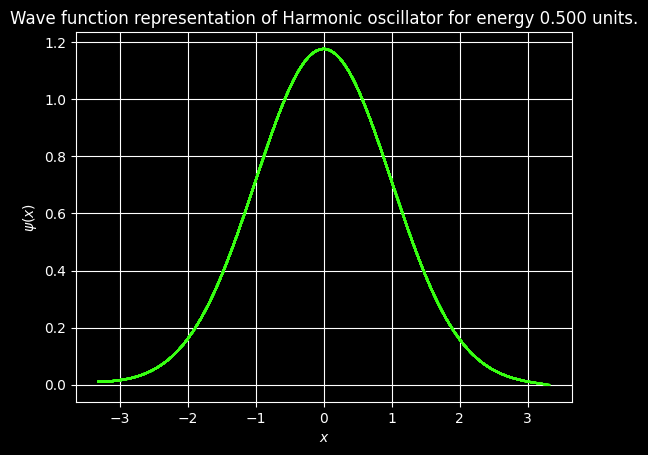

In [20]:
psi=0.01
dpsi=0
dx=0.01
E= 0.5

# V*x**2 + 10*V
a = np.sqrt(10+E/V)
x = -a

xlist=[]
psi_list=[]




while x<=a:
    ddpsi=2*m/hbar**2*(V*x**2-E)*psi # Observe carefully, This is the time independent Schrodinger wave equation.
    dpsi=dpsi+ddpsi*dx
    psi=psi+dpsi*dx
    x=x+dx
    xlist.append(x)
    psi_list.append(psi)
    plt.plot(xlist,psi_list,'#39FF13')

plt.title("Wave function representation of Harmonic oscillator for energy %.3f units."%(E))
plt.xlabel("$x$")
plt.ylabel("$\psi(x)$")
plt.grid()
plt.show()

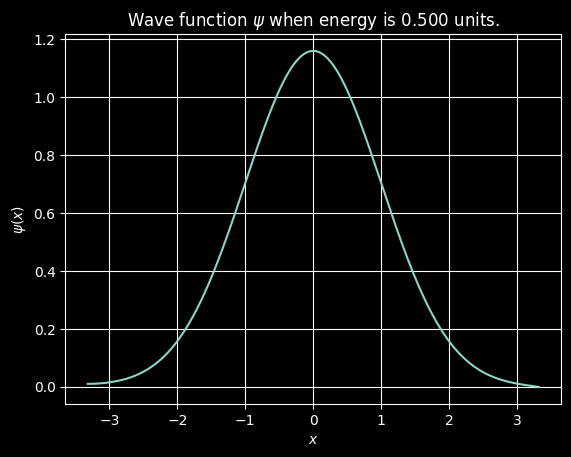

0.49999999999999994

In [21]:
dx = 0.001
E = 0
psi = 1
dE = 0.05

while abs(psi) > 0.02:
    psi = 0.01
    dpsi = 0.0
    E = E + dE
    a = np.sqrt(10+E/V)
    x = -a
    xlist = []
    psi_list = []
    
    while x <= a:
        ddpsi = 2*m/hbar**2*(V*x**2 - E)*psi 
        dpsi = dpsi + ddpsi*dx
        psi = psi + dpsi*dx 
        x = x + dx
        xlist.append(x)
        psi_list.append(psi)
        
plt.plot(xlist,psi_list)
plt.title('Wave function $\psi$ when energy is %.3f units.'%E)
plt.xlabel('$x$')
plt.ylabel('$\psi(x)$')
plt.grid()
plt.show()

E

In [22]:
dx = 0.001
E=0
dE = 0.05
psi=1
count=1
xvalues=[]
eigen_functions=[]
eigen_energies=[]
nmax=6

while count<=nmax:
    psi=1
    while abs(psi)>0.02:
        psi=0.01
        dpsi=0.0
        E=E+0.05
        a=np.sqrt(10+E/V)
        x=-a
        xlist=[]
        psilist=[]

        while x<=a:
            ddpsi=2*m/hbar**2*(V*x**2-E)*psi
            dpsi=dpsi+ddpsi*dx
            psi=psi+dpsi*dx
            x=x+dx
            xlist.append(x)
            psilist.append(psi)
    
    eigen_functions.append([psilist])
    eigen_energies.append(E)
    xvalues.append(xlist)
    count=count+1
    E=E*1.1

In [23]:
eigen_energies

[0.49999999999999994,
 1.5000000000000007,
 2.499999999999999,
 3.4999999999999964,
 4.499999999999995,
 5.499999999999993]

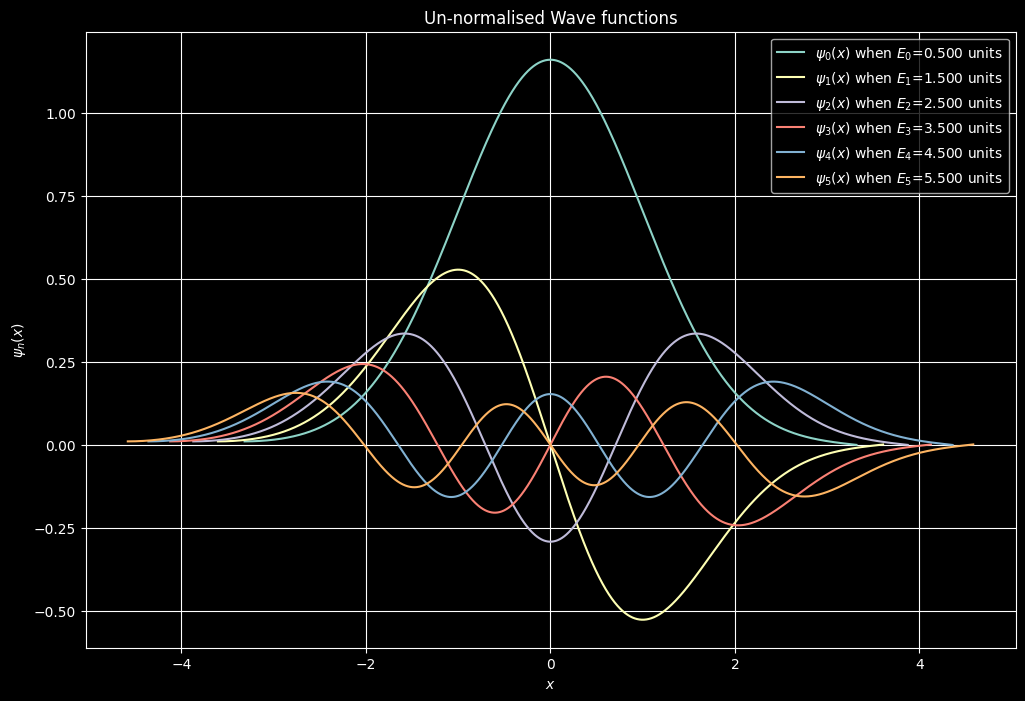

In [24]:
plt.figure(figsize=(12,8))
count=1
while count<=nmax:
    plt.plot(xvalues[count-1],eigen_functions[count-1][0]
             ,label="$\psi_{%d}(x)$ when $E_{%d}$=%.3f units"%(count-1,count-1,eigen_energies[count-1]))
    count=count+1
    
plt.legend()
plt.title('Un-normalised Wave functions')
plt.ylabel("$\psi_{n}(x)$")
plt.xlabel("$x$")
plt.show()

In [25]:
count = 1
while count <= nmax:
    norm = np.dot(eigen_functions[count-1][0],eigen_functions[count-1][0])*dx
    eigen_functions[count-1][0][:] = [x/np.sqrt(norm) for x in eigen_functions[count-1][0]]
    count = count + 1

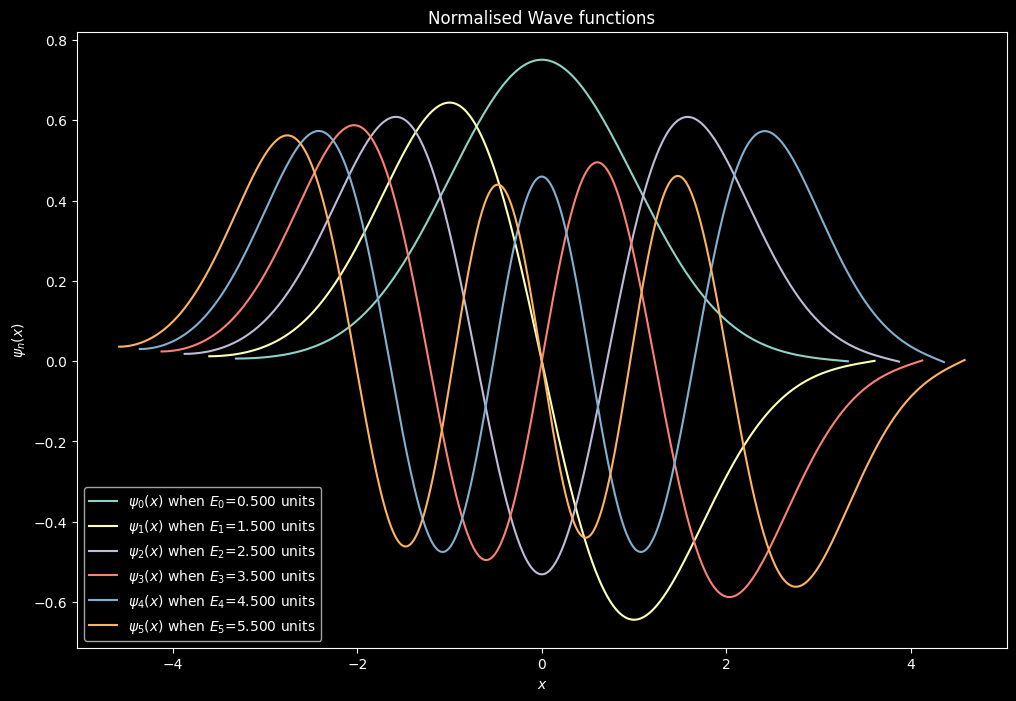

In [26]:
count=1

plt.figure(figsize=(12,8))
while count<=nmax:
    plt.plot(xvalues[count-1],eigen_functions[count-1][0]
             ,label="$\psi_{%d}(x)$ when $E_{%d}$=%.3f units"%(count-1,count-1,eigen_energies[count-1]))
    count=count+1
    
plt.legend()
plt.title('Normalised Wave functions')
plt.ylabel("$\psi_{n}(x)$")
plt.xlabel("$x$")
plt.show()

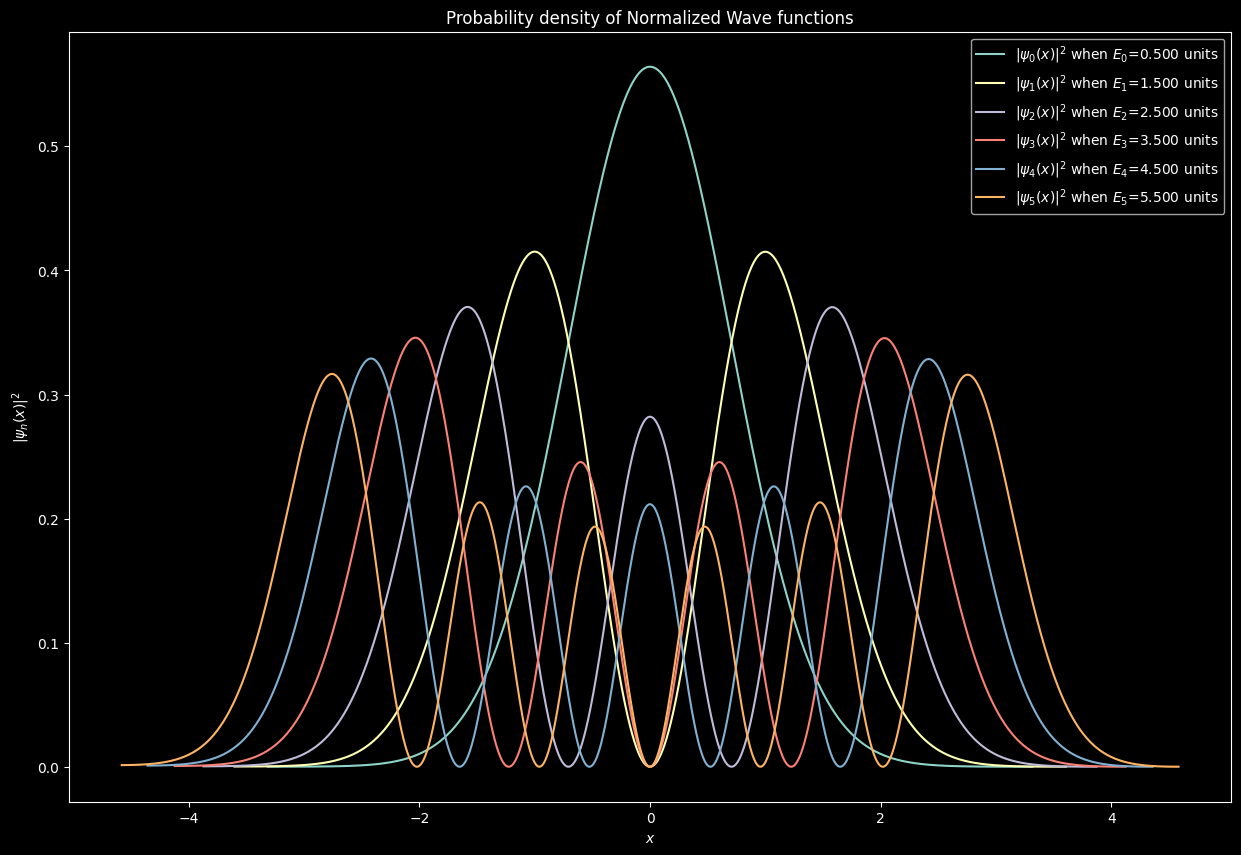

In [27]:
count=1

plt.figure(figsize=(15,10))
while count<=nmax:
    plt.plot(xvalues[count-1], np.square(eigen_functions[count-1][0]),
             label="$|\psi_{%d}(x)|^{2}$ when $E_{%d}$=%.3f units"%(count-1,count-1,eigen_energies[count-1]))
    count=count+1
    
plt.legend()
plt.title('Probability density of Normalized Wave functions')
plt.ylabel("$|\psi_{n}(x)|^{2}$")
plt.xlabel("$x$")

plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_9000\1843730150.py:11: RuntimeWarning: divide by zero encountered in divide
  plt.plot(x1*np.sqrt(eigen_energies[nmax-1]/V) ,1/np.sqrt(1-x1**2)/5,


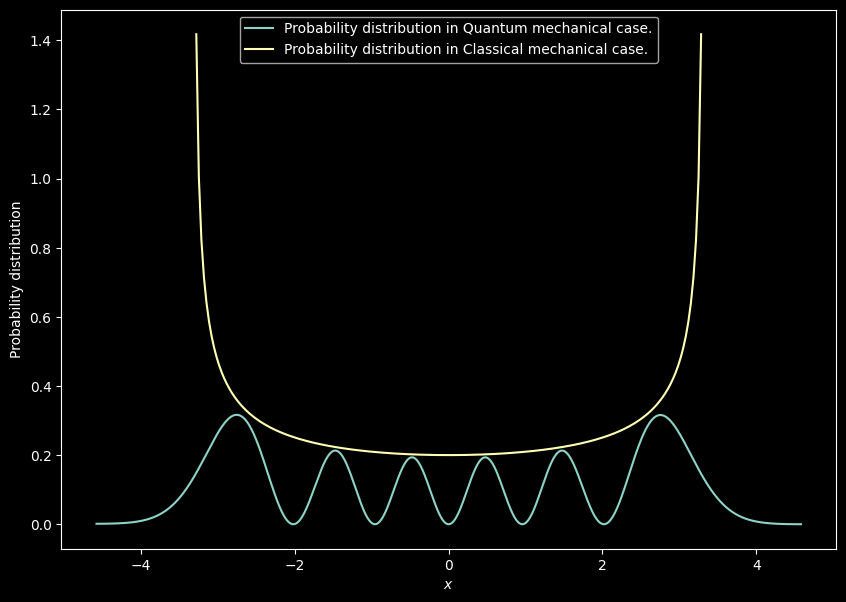

In [28]:
plt.figure(figsize=(10,7))

# QM probability
plt.plot(xvalues[nmax-1], np.square(eigen_functions[nmax-1][0]),
         label='Probability distribution in Quantum mechanical case.')

# Classical Probability, p = 1/v
# x(t) = cos(t) or t(x) = arccos(x) --> v(t) = -sin(t) or v(x) = -sin(arccos(x)) = sqrt(1-x**2)
 
x1 = np.arange(-1,1,1/100)
plt.plot(x1*np.sqrt(eigen_energies[nmax-1]/V) ,1/np.sqrt(1-x1**2)/5,
         label='Probability distribution in Classical mechanical case.')

plt.legend()
plt.xlabel('$x$')
plt.ylabel('Probability distribution')
plt.show()


In [29]:
count = 1
while count <= nmax:
    eigen_functions[count-1][0][:] = [x + eigen_energies[count-1] 
                                      for x in eigen_functions[count-1][0]]
    count = count + 1

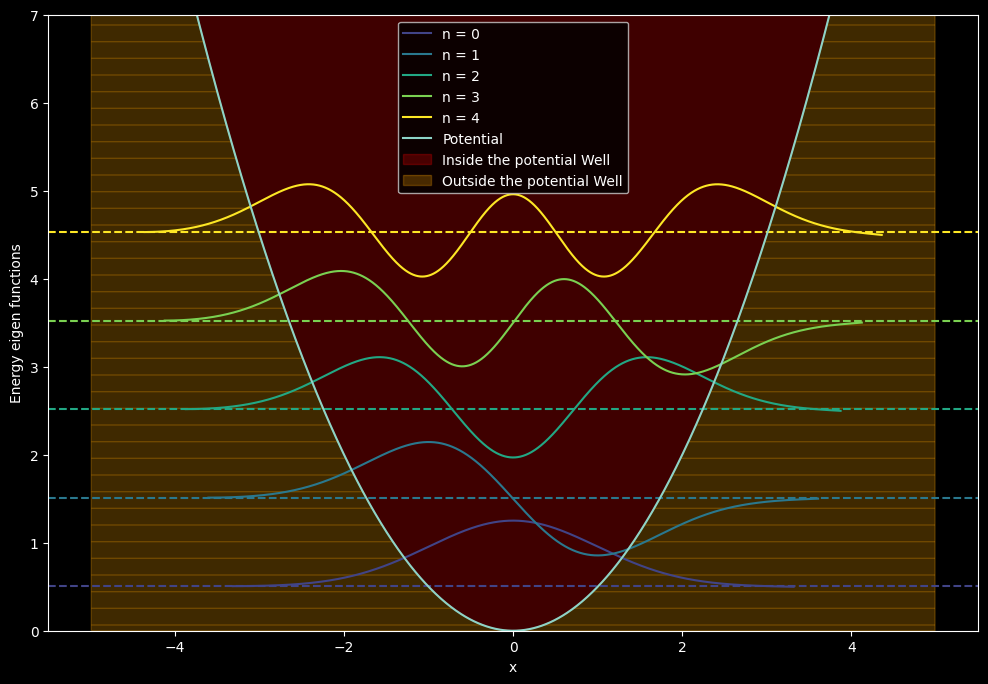

In [80]:
import numpy as np
import matplotlib.pyplot as plt

# Function to define the parabola
def potential(x):
    return V * x**2

# Parameters
V = 0.5
a = 5.0
nmax = 5  # Assuming you have defined nmax somewhere in your code

plt.figure(figsize=(12,8))

count = 1
while count <= nmax:
    color = plt.cm.viridis(count / nmax)  # Choosing color based on count
    
    plt.plot(
        xvalues[count-1], eigen_functions[count-1][0], color=color, label=f'n = {count-1}'
    )
    plt.axhline(y=(eigen_functions[count-1][0][0]), linestyle='--', color=color)
    
    count = count + 1

x = np.linspace(-a, a, 1000)

# Plotting the parabola
plt.plot(x, potential(x), label='Potential')

# Filling the area outside the parabola with red color
plt.fill_between(x, potential(x), 25, where=potential(x) >= 0, color='red', alpha=0.25, label='Inside the potential Well')
plt.fill_between(x, potential(x), where=(-a < x) & (x < a), color='orange', alpha=0.25, hatch='-', label='Outside the potential Well')

plt.ylim(0, nmax + 2)

# Adding labels and legend
plt.xlabel('x')
plt.ylabel('Energy eigen functions')
plt.legend()

# Display the plot
plt.show()
